In [379]:
import numpy as np
import pandas as pd
import math
import cv2
import heapq
import os, glob
import matplotlib.pyplot as plt

def BrightnessDivision(area_list):
    bright = ''
    grayscale_list = []
    center_area = 0
    grayscale_list_mean = 0
    for idx, area in enumerate(area_list) :
        #print(f'area number = {idx}')
        
        area = area.reshape((area.shape[0] * area.shape[1], 1))
        gray_area_mean = round(np.mean(area),1)
        grayscale_list.append(round(gray_area_mean, 1))
        
        if idx == 4 :
            #print("Center Point !")
            center_area = gray_area_mean
            
    #print(f'grayscale_list = {grayscale_list}')
    
    # max, min delete 
    #indexes = [np.max(grayscale_list), np.min(grayscale_list)]
    grayscale_list = list(filter(lambda  x : x <100, grayscale_list))
    #grayscale_list = np.setdiff1d(grayscale_list, indexes)
    
    bright_count = [ x <= 41  for x in grayscale_list].count(True)
    if bright_count >= 2 :
        print("어두운 사진")
        bright = 'off'
    else :
        print("밝은 사진")
        bright = 'on'
    #print(f'max, mean delete grayscale_list = {grayscale_list}')
    grayscale_list_mean = round(np.mean(grayscale_list),1)
    
    #print(f'center_area = {center_area}')
    #print(f'grayscale_list_mean = {grayscale_list_mean}')
    return grayscale_list, center_area, grayscale_list_mean, bright
    


In [391]:
data_dir = './data/test4'
FileList = glob.glob(data_dir + '/*.jpg')
img_namess = FileList

In [392]:
def devide_area(img):
    w,h,c = img.shape
#     print('width:  ', w)
#     print('height: ', h)
#     print('channel:', c)
    
#     dst0 = img[0:648, 0:864].copy()
#     dst1 = img[0:648, 864:1728].copy()
#     dst2 = img[0:648, 1728:2592].copy()
#     dst3 = img[648:1296, 0:864].copy()
#     dst4 = img[648:1296, 864:1728].copy()
#     dst5 = img[648:1296, 1728:2592].copy()
#     dst6 = img[1296:1944, 0:864].copy()
#     dst7 = img[1296:1944, 864:1728].copy()
#     dst8 = img[1296:1944, 1728:2592].copy()
    
    dst0 = img[0 : int(w/3) , 0 : int(h/3)].copy()
    dst1 = img[0 : int(w/3) , int(h/3) : int(2*h/3)].copy()
    dst2 = img[0 : int(w/3) , int(2*h/3) : h].copy()
    dst3 = img[int(w/3) : int(2*w/3) , 0 : int(h/3)].copy()
    dst4 = img[int(w/3) : int(2*w/3) , int(h/3) : int(2*h/3)].copy()
    dst5 = img[int(w/3) : int(2*w/3) , int(2*h/3) : h].copy()
    dst6 = img[int(2*w/3) : w , 0 : int(h/3)].copy()
    dst7 = img[int(2*w/3) : w , int(h/3) : int(2*h/3)].copy()
    dst8 = img[int(2*w/3) : w , int(2*h/3) : h].copy()
    
    
    area_list = []
    
    area_list.append(cv2.cvtColor(dst0, cv2.COLOR_BGR2GRAY))
    area_list.append(cv2.cvtColor(dst1, cv2.COLOR_BGR2GRAY))
    area_list.append(cv2.cvtColor(dst2, cv2.COLOR_BGR2GRAY))
    area_list.append(cv2.cvtColor(dst3, cv2.COLOR_BGR2GRAY))
    area_list.append(cv2.cvtColor(dst4, cv2.COLOR_BGR2GRAY))
    area_list.append(cv2.cvtColor(dst5, cv2.COLOR_BGR2GRAY))
    area_list.append(cv2.cvtColor(dst6, cv2.COLOR_BGR2GRAY))
    area_list.append(cv2.cvtColor(dst7, cv2.COLOR_BGR2GRAY))
    area_list.append(cv2.cvtColor(dst8, cv2.COLOR_BGR2GRAY))
    
    #return area_list

    return area_list

0 ./data/test4\FA0002_GW01_H01_0001_20211109083903_farm_image_real_ff72e0254b31.jpg


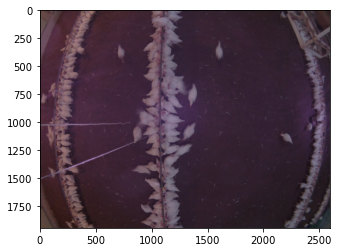

밝은 사진
1 ./data/test4\FA0002_GW01_H01_0001_20211125154017_farm_image_real_8658a494487a.jpg


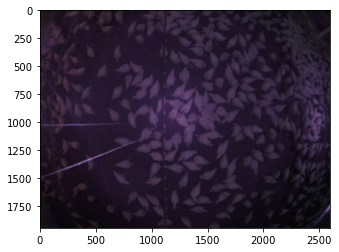

어두운 사진
2 ./data/test4\FA0002_GW01_H01_0002_20211125145232_farm_image_real_271fabc84456.jpg


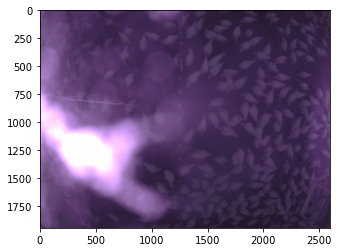

밝은 사진
3 ./data/test4\FA0002_GW01_H01_0007_20211125134852_farm_image_real_9cf28864470e.jpg


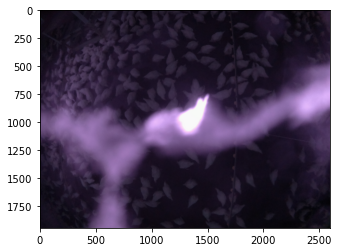

어두운 사진
4 ./data/test4\FA0002_GW01_H02_0010_20211125145634_farm_image_real_edd34b6040d7.jpg


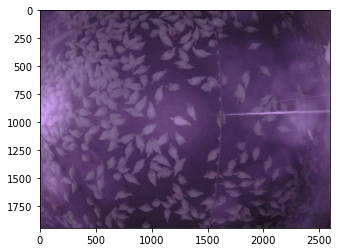

밝은 사진
5 ./data/test4\FA0002_GW01_H02_0012_20211125154435_farm_image_real_ebf43806417c.jpg


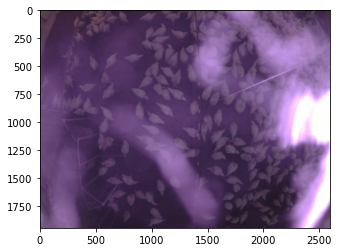

밝은 사진
6 ./data/test4\FA0002_GW01_H02_0013_20211125153440_farm_image_real_b69dbe95495d.jpg


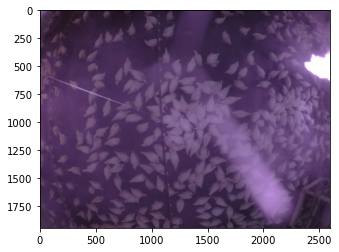

밝은 사진
7 ./data/test4\FA0002_GW01_H02_0014_20211125150635_farm_image_real_ea8bff274bc1.jpg


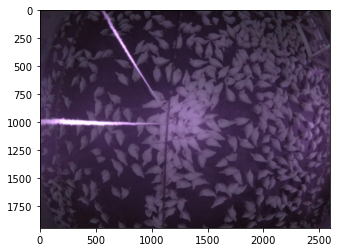

밝은 사진
8 ./data/test4\FA0002_GW01_H02_0014_20211125154037_farm_image_real_2192cea442bc.jpg


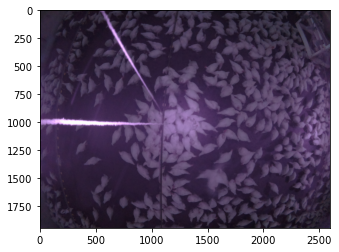

밝은 사진
9 ./data/test4\FA0002_GW01_H02_0015_20211125154639_farm_image_real_658077de4bb5.jpg


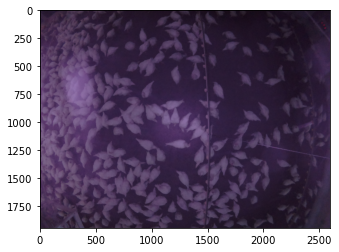

밝은 사진


In [393]:
df = pd.DataFrame(columns=['image_name', 'grayscale_list', 'center_area', 'grayscale_list_mean','bright'])

for idx, d in enumerate(img_namess):
    try :
        index =  d.rfind('FA')
        
        #if idx > 15 :
            #break
        
        print(idx, d)
        im = cv2.imread(d, cv2.IMREAD_COLOR)
        if im is None : raise Exception('image not found')

        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
        plt.show()
        area_list = devide_area(im)
        grayscale_list, center_area, grayscale_list_mean, bright = BrightnessDivision(area_list)
        df.loc[idx] = [d[index : ], grayscale_list, center_area, grayscale_list_mean, bright]
    
    except Exception as e :
        print(e)


In [390]:
#df['bright'] = [0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]

In [376]:
df.groupby('bright',as_index=False)['grayscale_list_mean'].agg(['min','max'])

,min,max
bright,,
off,25.1,51.9
on,51.8,80.1


In [378]:
df

,image_name,grayscale_list,center_area,grayscale_list_mean,bright
0,FA0002_GW01_H01_0001_20211110125121_farm_image...,"[26.0, 28.0, 22.3, 29.7, 38.5, 28.6, 17.0, 22....",38.5,25.1,off
1,FA0002_GW01_H01_0001_20211110155303_farm_image...,"[26.2, 33.8, 23.2, 30.1, 45.3, 29.2, 15.8, 25....",45.3,27.2,off
2,FA0002_GW01_H01_0002_20211110122650_farm_image...,"[69.3, 50.5, 40.5, 67.8, 48.9, 48.4, 37.5]",67.8,51.8,on
3,FA0002_GW01_H01_0002_20211110134233_farm_image...,"[68.9, 52.0, 39.6, 68.1, 49.4, 48.6, 36.9]",68.1,51.9,off
4,FA0002_GW01_H01_0007_20211110145850_farm_image...,"[49.5, 27.2, 34.2, 70.2, 73.9, 62.8, 26.8, 22.2]",70.2,45.8,off
5,FA0002_GW01_H02_0010_20211108084041_farm_image...,"[66.6, 46.8, 52.1, 93.9, 70.7, 79.1, 66.1, 48....",70.7,63.1,on
6,FA0002_GW01_H02_0010_20211108091239_farm_image...,"[95.9, 82.0, 75.3, 92.2, 90.2, 80.3, 71.4, 53.8]",92.2,80.1,on
7,FA0002_GW01_H02_0010_20211108100840_farm_image...,"[96.5, 83.3, 74.9, 96.8, 87.0, 77.9, 63.5, 54.3]",96.8,79.3,on
8,FA0002_GW01_H02_0012_20211108084826_farm_image...,"[69.1, 75.6, 86.0, 70.5, 76.3, 99.3, 66.4, 67....",76.3,74.9,on
9,FA0002_GW01_H02_0012_20211108100429_farm_image...,"[67.0, 84.3, 69.8, 73.8, 68.0, 71.9, 61.9]",73.8,71.0,on
